# Porco ou cachorro ?

In [ ]:
#caracteristicas:
# [é gordinho?, tem perninha curta?, faz auau?]

porco1 = [1, 1, 0]
porco2 = [1, 1, 0]
porco3 = [1, 1, 0]
cachorro1 = [1, 1, 1]
cachorro2 = [0, 1, 1]
cachorro3 = [0, 1, 1]

dados = [porco1, porco2, porco3, 
cachorro1, cachorro2, cachorro3]

In [ ]:
#1 = porco e -1 = cachorro
marcacoes = [1,1,1,-1,-1,-1]

misterioso1 = [1,1,1] #porco ou cachorro?
misterioso2 = [1,0,0]
misterioso3 = [0,0,1]

In [ ]:
from sklearn.naive_bayes import MultinomialNB #O algoritmo de bayes é um dos mais simples algoritmos de ML
from sklearn.metrics import accuracy_score
import numpy as np

seed=5
np.random.seed(seed)

modelo = MultinomialNB()# MultinomialNB é um algoritmo bayesiano

x=dados
y=marcacoes
teste_x = [misterioso1, misterioso2, misterioso3]
teste_y = [-1, 1, -1]
modelo.fit(x,y)
resultado = modelo.predict(teste_x)

print(accuracy_score(teste_y,resultado)*100,'%')

100.0 %


# Comprou ou não ?

In [ ]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/machine-learning-introducao-a-classificacao/master/acesso.csv')
dados

# home = 1 indica que o usuario entrou na home do produto
# como_funciona = 1 indica que o usuario entrou na pagina como_funciona do produto
# contato = 1 indica que o usuario entrou na pagina contato do produto
# comprou = 1 indiaca que o usuário comprou o produto

,home,como_funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
94,0,0,1,0
95,1,1,1,1
96,0,0,1,0
97,0,1,0,0


In [ ]:
x = dados[['home','como_funciona','contato']]
y = dados['comprou']

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

seed = 5
np.random.seed(seed)

treino_x,teste_x,treino_y,teste_y = train_test_split(x, y, stratify=y, test_size=0.30)

modelo = MultinomialNB()
modelo.fit(treino_x,treino_y)
result = modelo.predict(teste_x)

print(accuracy_score(teste_y, result)*100,'%')

93.33333333333333 %


# Variaveis categóricas

* Uma variável categorica é uma variável com várias categorias imbutidas, ou seja, não posso classificar diretamente com 0 ou 1
* O computador não entende a palavra "java", mas entende que "java" não é "algoritmos" (categoria 1), nem "ruby" (categoria 3) e sim é categoria 2, logo posso representar um dado string como binario com o uso de categorias
("java" = 0 1 0)
* A variável "busca" pode ser representada por outras 3 variáveis
* Há uma categoria para cada elemento de "busca"
* categoria 0, categoria 1 e categoria 2 são chamadas de variáveis/colunas dummy, pois são variáveis que juntas representam uma coisa, que no caso acima seria "busca"


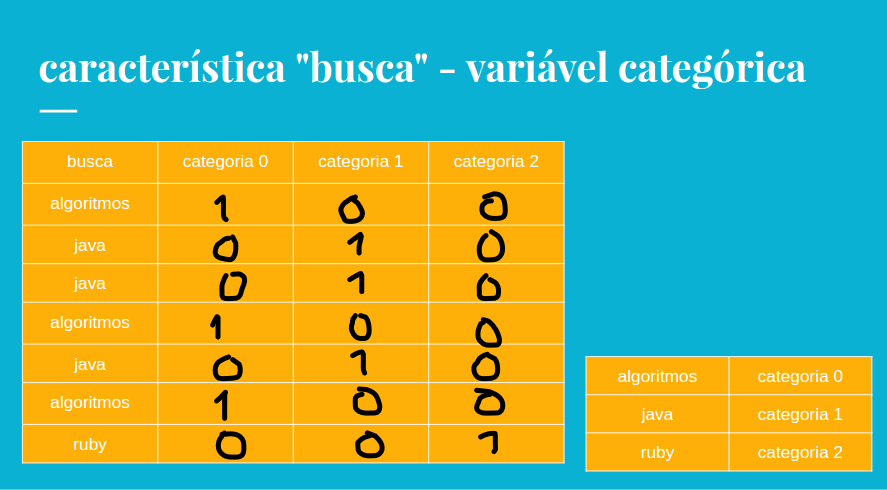

In [ ]:
#BIZU: Como podemos classificar uma variável categórica com valores binários (0 ou 1)?
#Criando uma categoria para cada valor distinto da variável categórica.

In [ ]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/machine-learning-introducao-a-classificacao/master/busca.csv')
dados

,home,busca,logado,comprou
0,0,algoritmos,1,sim
1,0,java,0,sim
2,1,algoritmos,0,sim
3,1,ruby,1,nao
4,1,ruby,0,sim
...,...,...,...,...
995,0,ruby,0,nao
996,0,ruby,0,sim
997,0,java,1,sim
998,1,algoritmos,0,sim


In [ ]:
x = dados[['home','busca','logado']]
y = dados.comprou


# Encontrando dummys

In [ ]:
#transformando 'busca' em variáveis dummys
Xdummies = pd.get_dummies(x) #método do pandas que retorna automaticamente os dummys de um dataframe

#A coluna 'busca' se tornou as colunas 'busca_algoritmos', 'busca_java', 'busca_ruby'
Xdummies 

#Ex: A primeira linha representa busca = 'algoritmos',pois busca_algoritmos = 1 e o resto é 0
#    A segunda linha representa busca = 'java', pois busca_java = 1 e o resto é 0

,home,logado,busca_algoritmos,busca_java,busca_ruby
0,0,1,1,0,0
1,0,0,0,1,0
2,1,0,1,0,0
3,1,1,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
995,0,0,0,0,1
996,0,0,0,0,1
997,0,1,0,1,0
998,1,0,1,0,0


In [ ]:
Ydummy = pd.get_dummies(y)
Ydummy
#A primeira linha representa 'sim' pois sim =1 e não = 0
#A segunda linha representa 'não' pois nao =1 e sim =0

,nao,sim
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
995,1,0
996,0,1
997,0,1
998,0,1


In [ ]:
y =Ydummy['sim'] #Ydummy é igual a y formatado para a forma binária
x = Xdummies

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

seed = 5
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,  train_size=0.9, shuffle=False)

modelo = MultinomialNB()
modelo.fit(treino_x, treino_y)
result = modelo.predict(teste_x)
print(accuracy_score(teste_y, result)*100,"%")

82.0 %


In [ ]:
#criando o dummy
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
print(dummy.score(teste_x, teste_y)*100, "%")
#Meu algoritmo original é igual ao algoritmo dummy

82.0 %


In [ ]:
#Resultado do original (chuta 1 para tudo)
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
#Resultado do dummy (chuta 1 para tudo)
dummy.predict(teste_x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

# Importando uma base da dados menor

In [ ]:
import pandas as pd
dados2 = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/machine-learning-introducao-a-classificacao/master/busca2.csv')
dados2

,home,busca,logado,comprou
0,0,ruby,1,1
1,1,algoritmos,0,0
2,0,algoritmos,0,1
3,1,java,1,1
4,1,algoritmos,0,0
...,...,...,...,...
70,1,algoritmos,1,0
71,1,ruby,0,1
72,0,ruby,0,1
73,1,ruby,1,1


In [ ]:
x = dados2[['home','busca','logado']]
y = dados2.comprou


In [ ]:
Xdummies = pd.get_dummies(x) 
x = Xdummies

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

seed = 5
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,  train_size=0.9, shuffle=False)

modelo = MultinomialNB()
modelo.fit(treino_x, treino_y)
result = modelo.predict(teste_x)
print(accuracy_score(teste_y, result)*100,"%")

75.0 %


In [ ]:
#criando o dummy
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
print(dummy.score(teste_x, teste_y)*100, "%")


62.5 %


# AdaBoost


In [ ]:
#AdaBoost para o menor conjunto de dados

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

seed = 5
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,  train_size=0.9, shuffle=False)

modelo = AdaBoostClassifier()
modelo.fit(treino_x, treino_y)
result = modelo.predict(teste_x)
print(accuracy_score(teste_y, result)*100,"%")

#Ada boost deu o mesmo resultado

75.0 %


In [ ]:
#AdaBoost para o maior conjunto de dados

x = dados[['home','busca','logado']]
y = dados.comprou
x = pd.get_dummies(x)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

seed = 5
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,  train_size=0.9, shuffle=False)

modelo = AdaBoostClassifier()
modelo.fit(treino_x, treino_y)
result = modelo.predict(teste_x)
print(accuracy_score(teste_y, result)*100,"%")

#Ada boost deu um resultado um pouco melhor que o MultinomialNB

85.0 %
